# **Image Classification of Omnivores and Herbivores using the CIFAR-100 Dataset**

This project aims to classify images into two categories: omnivores and herbivores, utilizing the CIFAR-100 dataset. The CIFAR-100 dataset contains 60,000 32x32 color images in 100 classes, with each class containing 600 images. Here, we focus on distinguishing between animals that primarily consume plants (herbivores) and those that consume both plants and animals (omnivores). Through deep learning techniques and convolutional neural networks (CNNs), we seek to build a model capable of accurate classification among diverse species.


## **Import modules**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## **Import the dataset**

In [2]:
(X_coarse_train, y_coarse_train), (X_coarse_test, y_coarse_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='coarse'
)

(X_fine_train, y_fine_train), (X_fine_test, y_fine_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

169001437/169001437 [==============================] - 3s 0us/step


## **Data Preprocessing**
We will be extracting only the `large omnivores and herbivores` coarse class from the dataset along with their fine classes.

In [3]:
# Extracting images from coarse dataset

coarse_train_index = (y_coarse_train == 11).reshape(X_coarse_train.shape[0]) # Returns the indices where y_coarse_train == 11
X_train = X_coarse_train[coarse_train_index] # Extracts the images from X_train with indices that match the class

coarse_test_index = (y_coarse_test == 11).reshape(X_coarse_test.shape[0])
X_test = X_coarse_test[coarse_test_index]

In [4]:
# Extracting index of fine labels

labels_of_herbi_omni = []
label_mapping = {}

str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
              'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
              'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain',
              'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
              'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
              'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
herbi_omni = ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
print("Fine labels of Herbivores and Omnivores:")
for i, name in enumerate(str_labels):
  if name in herbi_omni:
    print(f"{i}: {name}")
    label_mapping[i] = herbi_omni.index(name)
    labels_of_herbi_omni.append(i)

Fine labels of Herbivores and Omnivores:
15: camel
19: cattle
21: chimpanzee
31: elephant
38: kangaroo


In [5]:
# Extracting fine labels of images from coarse indices

fine_train_index = np.isin(y_fine_train, labels_of_herbi_omni).reshape(X_fine_train.shape[0])
y_train = y_fine_train[fine_train_index]

fine_test_index = np.isin(y_fine_test, labels_of_herbi_omni).reshape(X_fine_test.shape[0])
y_test = y_fine_test[fine_test_index]

In [6]:
# Convert fine labels from their original numbers to arbitrary categorical numbers from 0 - 4

y_train = np.array([label_mapping[label[0]] for label in y_train]).reshape(-1, 1)
y_test = np.array([label_mapping[label[0]] for label in y_test]).reshape(-1, 1)

# Convert training and test labels to categorical variables. This does one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [7]:
def count_samples():
  # Count samples per class in training set
  train_counts = {label: np.sum(np.argmax(y_train, axis=1) == label) for label in range(y_train.shape[1])}

  # Count samples per class in testing set
  test_counts = {label: np.sum(np.argmax(y_test, axis=1) == label) for label in range(y_test.shape[1])}

  print("\nNumber of samples per class in training set: ")
  for label, count in train_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")

  print("\nNumber of samples per class in testing set: ")
  for label, count in test_counts.items():
      print(f"{herbi_omni[label]} ({label}): {count}")


  print(f"\nTotal number of training samples: {sum(train_counts.values())}")
  print(f"Total number of test samples: {sum(test_counts.values())}")

count_samples()


Number of samples per class in training set: 
camel (0): 500
cattle (1): 500
chimpanzee (2): 500
elephant (3): 500
kangaroo (4): 500

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 2500
Total number of test samples: 500


In [8]:
# Normalize the pixels of the images from 0 to 1

X_train = X_train / 255
X_test = X_test / 255

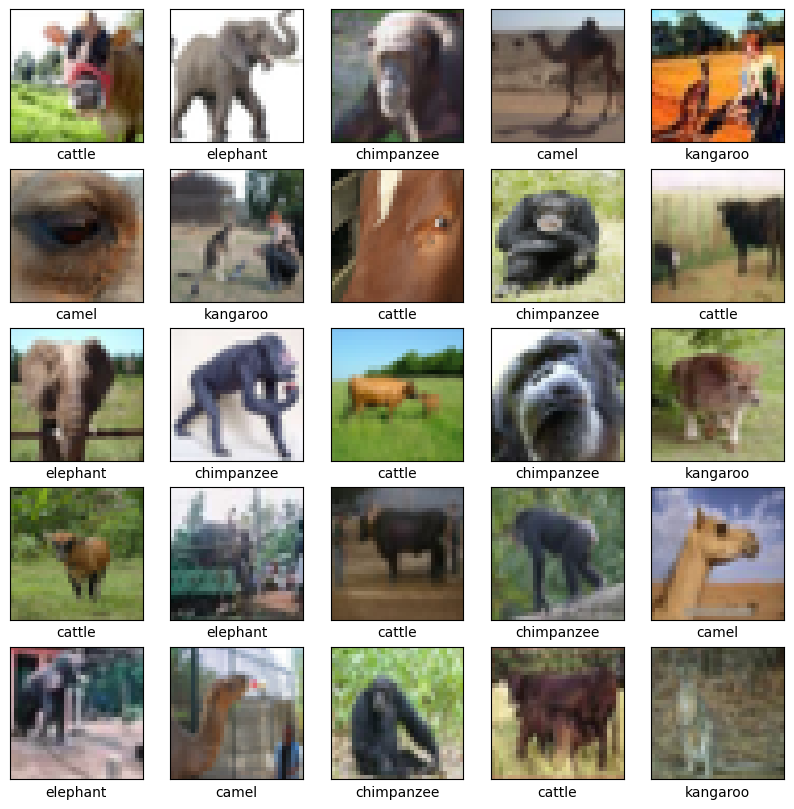

In [9]:
# Display 25 sample images with labels
def view_samples():
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X_train[i], cmap=plt.cm.binary)
      plt.xlabel(herbi_omni[np.argmax(y_train[i])])
  plt.show()

view_samples()

## **Data Augmentation**
The dataset is too small for accurate image processing. According to Picsellia (2022), for a dataset to be adequate in size for image classification, around 1000 images per class is needed.

In [10]:
data_augmentation_pipeline = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomContrast(0.3)
])

# Define the number of times to augment each image
num_augmentations = 2

# Initialize lists to store augmented images and labels
augmented_training_set = []
augmented_labels = []

# Apply data augmentation to each image multiple times
for image, label in zip(X_train, y_train):
    for _ in range(num_augmentations):
        augmented_image = data_augmentation_pipeline(image)  # Apply data augmentation
        augmented_training_set.append(augmented_image)
        augmented_labels.append(label)

augmented_training_set = np.array(augmented_training_set)
augmented_labels = np.array(augmented_labels)

In [11]:
augmented_training_set.shape

(5000, 32, 32, 3)

There are 5000 new images generated from the augmented training set. Below are some examples of the augmentations done.

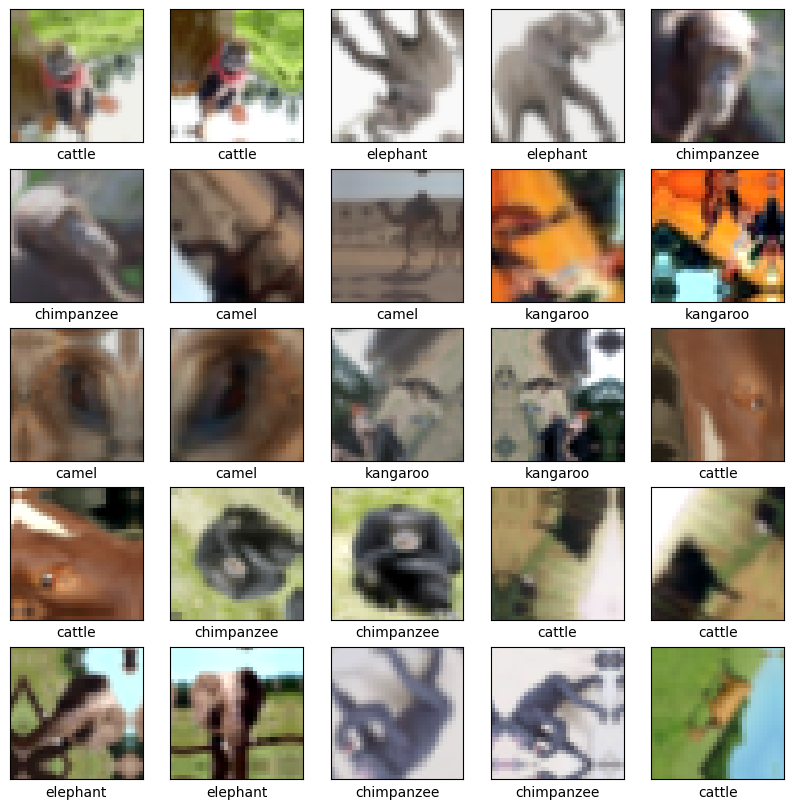

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_training_set[i], cmap=plt.cm.binary)
    plt.xlabel(herbi_omni[np.argmax(augmented_labels[i])])
plt.show()

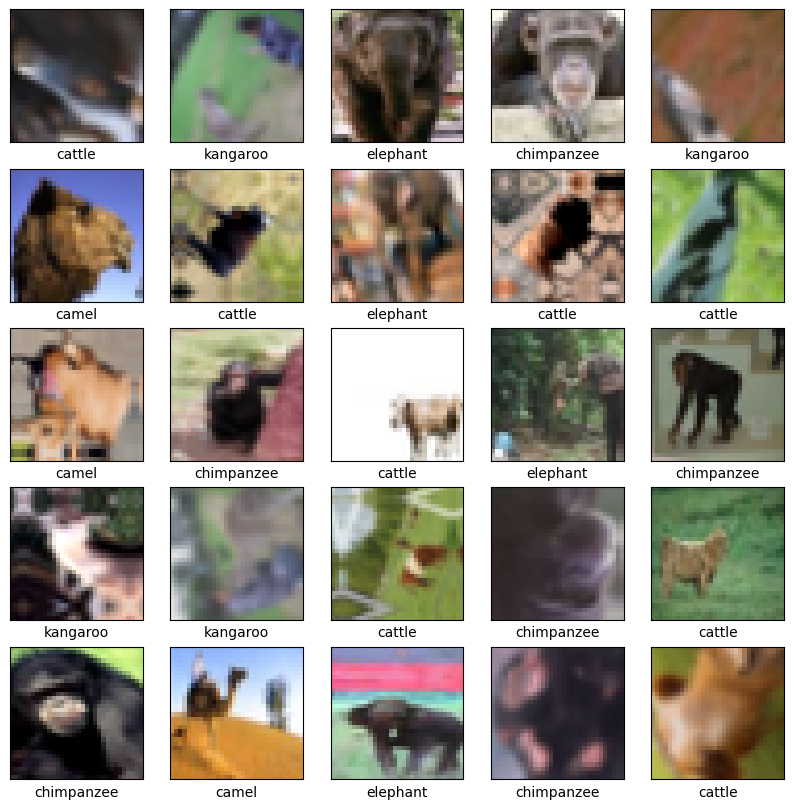

In [13]:
# Merge original and augmented dataset, and shuffle to ensure randomness
X_train = np.concatenate((X_train, augmented_training_set), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Shuffle the merged dataset to maintain randomness
shuffle_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

view_samples()

In [14]:
# Count samples again to see how much the dataset increased by
count_samples()


Number of samples per class in training set: 
camel (0): 1500
cattle (1): 1500
chimpanzee (2): 1500
elephant (3): 1500
kangaroo (4): 1500

Number of samples per class in testing set: 
camel (0): 100
cattle (1): 100
chimpanzee (2): 100
elephant (3): 100
kangaroo (4): 100

Total number of training samples: 7500
Total number of test samples: 500


We have now satisfied the minimum 1000 as cited earlier. We can now attempt training.

## **Model Training**
The neural network to be created is a Convolutional Neural Network (CNN). We will be making use of 3 layers of Convolution with Dropout layers in between. There will also be Batch Normalization layers in order to ensure that no weight during gradient descent will be far greater or lesser than others. This also speeds up the model.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path to save the model
filepath = 'highest_performing_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.35),

    layers.GlobalAveragePooling2D(),  # Applying Global Average Pooling instead of Flatten
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Applying Gradient Clipping
optimizer = tf.keras.optimizers.Adam(clipvalue=0.5)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, epochs=300, validation_split=0.1, validation_data=(X_test[:1500], y_test[:1500]), callbacks=[checkpoint])
model.load_weights(filepath)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/235 [============================>.] - ETA: 0s - loss: 1.3243 - accuracy: 0.4586
Epoch 2: val_accuracy improved from 0.24000 to 0.40000, saving model to highest_performing_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 1.3239 - accuracy: 0.4588 - val_loss: 1.4415 - val_accuracy: 0.4000
Epoch 3/300
232/235 [============================>.] - ETA: 0s - loss: 1.2527 - accuracy: 0.4922
Epoch 3: val_accuracy improved from 0.40000 to 0.53400, saving model to highest_performing_model.h5
235/235 [==============================] - 2s 10ms/step - loss: 1.2538 - accuracy: 0.4921 - val_loss: 1.1637 - val_accuracy: 0.5340
Epoch 4/300
232/235 [============================>.] - ETA: 0s - loss: 1.2051 - accuracy: 0.5193
Epoch 4: val_accuracy improved from 0.53400 to 0.54800, saving model to highest_performing_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 1.2049 - accuracy: 0.5196 - val_loss: 1.1411 - val_accuracy: 0.5480
Epoch 5/300
234/235 [======

## Transfer Learning

In [20]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the pre-trained model
model = tf.keras.models.load_model('highest_performing_model.h5')

# Unfreeze some layers
for layer in model.layers:
    layer.trainable = True

# lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(lr=1e-5)  # Example: lr=1e-5

# Compile the model with the new optimizer and a lower learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test[:1500], y_test[:1500]), callbacks=[checkpoint])
best_model = tf.keras.models.load_model(filepath)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
best_model.save('best_fine_tuned_model.h5')


Epoch 1/300
232/235 [============================>.] - ETA: 0s - loss: 0.9040 - accuracy: 0.7435
Epoch 1: val_accuracy improved from -inf to 0.72800, saving model to best_model.h5
235/235 [==============================] - 7s 11ms/step - loss: 0.9014 - accuracy: 0.7440 - val_loss: 0.8516 - val_accuracy: 0.7280
Epoch 2/300
233/235 [============================>.] - ETA: 0s - loss: 0.6609 - accuracy: 0.7657
Epoch 2: val_accuracy improved from 0.72800 to 0.77000, saving model to best_model.h5
235/235 [==============================] - 2s 10ms/step - loss: 0.6610 - accuracy: 0.7661 - val_loss: 0.8019 - val_accuracy: 0.7700
Epoch 3/300
230/235 [============================>.] - ETA: 0s - loss: 0.6067 - accuracy: 0.7807
Epoch 3: val_accuracy did not improve from 0.77000
235/235 [==============================] - 3s 11ms/step - loss: 0.6046 - accuracy: 0.7816 - val_loss: 0.8540 - val_accuracy: 0.7620
Epoch 4/300
230/235 [============================>.] - ETA: 0s - loss: 0.5783 - accuracy: 0.7

In [30]:
# Final Transfer Learning

# Load the previous pre-trained model
model = tf.keras.models.load_model('best_fine_tuned_model.h5')

# Unfreeze some layers
for layer in model.layers:
    layer.trainable = True

# lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(lr=1e-5)  # Example: lr=1e-5

# Compile the model with the new optimizer and a lower learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test[:1500], y_test[:1500]), callbacks=[checkpoint])
best_model = tf.keras.models.load_model(filepath)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
best_model.save('final_fine_tuned_model.h5')


Epoch 1/300
234/235 [============================>.] - ETA: 0s - loss: 0.8400 - accuracy: 0.7724
Epoch 1: val_accuracy improved from -inf to 0.75200, saving model to best_model.h5
235/235 [==============================] - 7s 13ms/step - loss: 0.8396 - accuracy: 0.7725 - val_loss: 0.8143 - val_accuracy: 0.7520
Epoch 2/300
  8/235 [>.............................] - ETA: 1s - loss: 0.6071 - accuracy: 0.7656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


229/235 [============================>.] - ETA: 0s - loss: 0.6135 - accuracy: 0.7858
Epoch 2: val_accuracy improved from 0.75200 to 0.75800, saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.6169 - accuracy: 0.7849 - val_loss: 0.7809 - val_accuracy: 0.7580
Epoch 3/300
231/235 [============================>.] - ETA: 0s - loss: 0.5663 - accuracy: 0.8019
Epoch 3: val_accuracy improved from 0.75800 to 0.76600, saving model to best_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.5698 - accuracy: 0.8011 - val_loss: 0.8037 - val_accuracy: 0.7660
Epoch 4/300
235/235 [==============================] - ETA: 0s - loss: 0.5266 - accuracy: 0.8092
Epoch 4: val_accuracy improved from 0.76600 to 0.78200, saving model to best_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.5266 - accuracy: 0.8092 - val_loss: 0.7971 - val_accuracy: 0.7820
Epoch 5/300
233/235 [============================>.] - ETA: 0s - loss:

## Metrics

16/16 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       100
           1       0.76      0.76      0.76       100
           2       0.94      0.93      0.93       100
           3       0.84      0.70      0.77       100
           4       0.74      0.86      0.79       100

    accuracy                           0.79       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.79      0.79       500



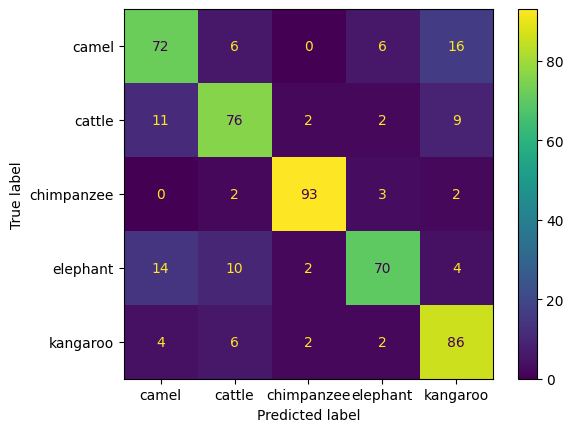

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
model = tf.keras.models.load_model('final_fine_tuned_model.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]

print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=herbi_omni)

cm_display.plot()
plt.show()

In [38]:
# Evaluate loss on the training set
train_loss = model.evaluate(X_train, y_train, verbose=0)

print("Training Loss:", train_loss[0])
print("Training Accuracy:", train_loss[1])

# Evaluate loss on the testing set
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Testing Loss:", test_loss[0])
print("Testing Accuracy:", test_loss[1])

Training Loss: 0.00021732655295636505
Training Accuracy: 1.0
Testing Loss: 1.5348057746887207
Testing Accuracy: 0.7940000295639038


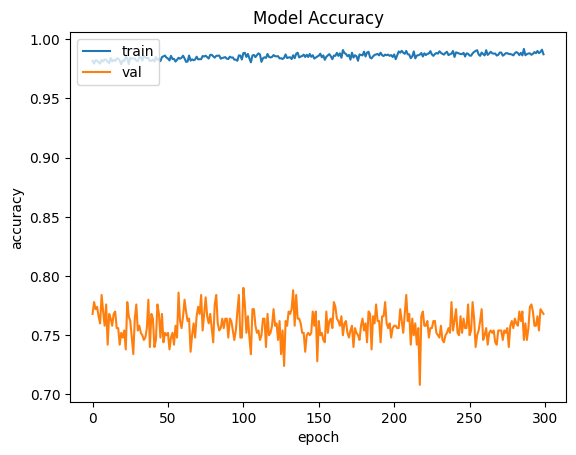

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

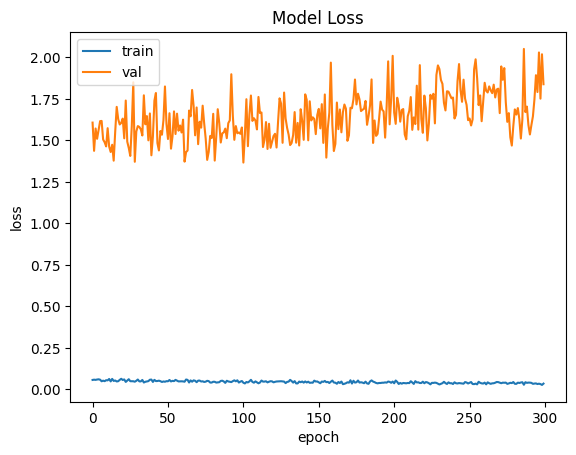

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Exporting the model**

In [41]:
import datetime
file_name = input("Enter a file name: ")
current_date = datetime.datetime.now().strftime("%Y-%m-%d")
model_path = f'{file_name}_{current_date}.h5'
model.save(model_path)
model.save_weights(f'{file_name}_{current_date}_weights.h5')


Enter a file name: 79VAC_FINALMODEL_


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
